In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv('C:/Users/This/Downloads/Titanic-Dataset.csv') 

In [3]:
print("first 5 rows of dataset:")
print(data.head())


first 5 rows of dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8

In [4]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [6]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [7]:
data.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [8]:
label_encoders = {}
categorical_features = ['Sex', 'Embarked']
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

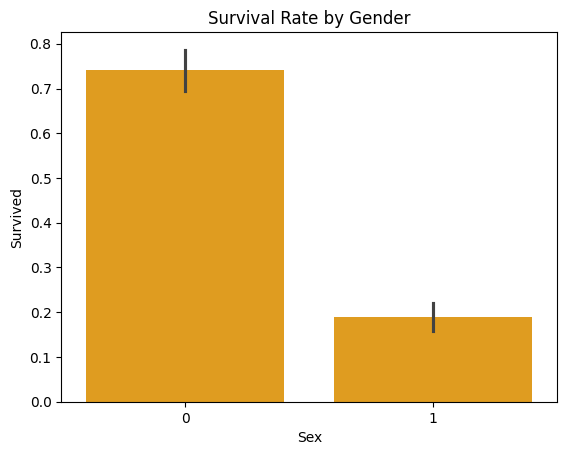

In [25]:
sns.barplot(x='Sex', y='Survived', data=data,color='orange')
plt.title('Survival Rate by Gender')
plt.show()

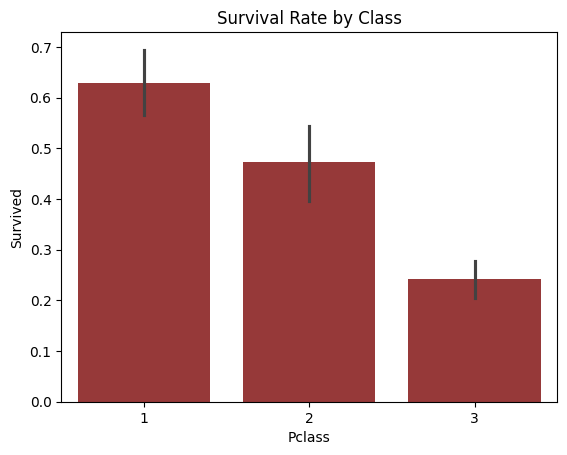

In [27]:
sns.barplot(x='Pclass', y='Survived',color='brown', data=data)
plt.title('Survival Rate by Class')
plt.show()

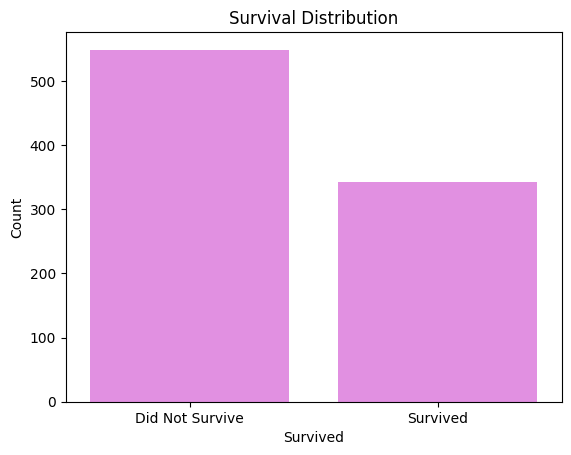

In [28]:
sns.countplot(x='Survived',color='violet', data=data)
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.show()

In [13]:
X = data.drop('Survived', axis=1)
y = data['Survived']


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
y_pred = model.predict(X_test)

In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8212290502793296

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


Confusion Matrix:
 [[92 13]
 [19 55]]


In [19]:
#Save the model
joblib.dump(model, 'titanic_survival_model.pkl')

['titanic_survival_model.pkl']

In [20]:
# Load the model
loaded_model = joblib.load('titanic_survival_model.pkl')

In [22]:
#Example for both survival and not survival scenarios
sample_data = pd.DataFrame(
    [
        [3, 1, 22, 1, 0, 7.25, 0],  # Passenger 1: Did not survive (likely)
        [1, 0, 38, 0, 1, 71.28, 0], # Passenger 2: Survived (likely)
        [3, 1, 24, 0, 0, 8.05, 2],  # Passenger 3: Did not survive (likely)
        [2, 0, 30, 0, 0, 12.35, 1]  # Passenger 4: Survived (likely) 
    ],
    columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])
        
scaled_samples = scaler.transform(sample_data)

predictions = loaded_model.predict(scaled_samples)

sample_data['Survival Prediction'] = ['Survived' if p == 1 else 'Did not survive' for p in predictions]
              
print(sample_data)

   Pclass  Sex  Age  SibSp  Parch   Fare  Embarked Survival Prediction
0       3    1   22      1      0   7.25         0     Did not survive
1       1    0   38      0      1  71.28         0            Survived
2       3    1   24      0      0   8.05         2     Did not survive
3       2    0   30      0      0  12.35         1            Survived
